# K-MEANS CLUSTERING

In [1]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install disutils

Note: you may need to restart the kernel to use updated packages.


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.columns = ['Cus.ID', 'Gender', 'Age', 'Income','Spending']
df.head()

,Cus.ID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Clssify similar customer on basis of income and spend

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

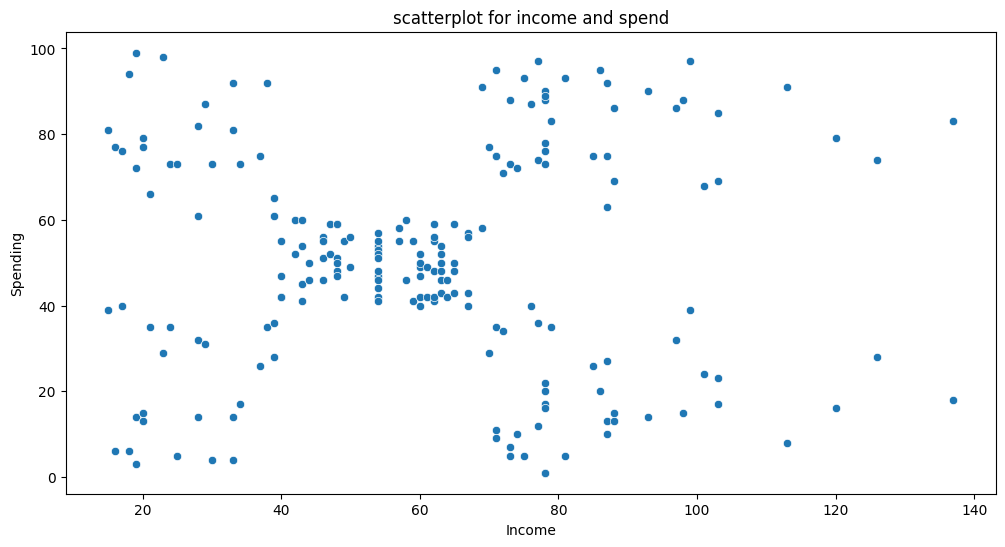

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Income',y='Spending')
plt.title('scatterplot for income and spend')
plt.show()

# Seprate X and Y

In [12]:
X = df[['Income','Spending']]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Create a PREPROCESSING PIPELINE

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [14]:
con_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [15]:
con_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [16]:
X_pre = con_pipe.fit_transform(X)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# K-means find optimal value of K with Elbow Method

In [17]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [18]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

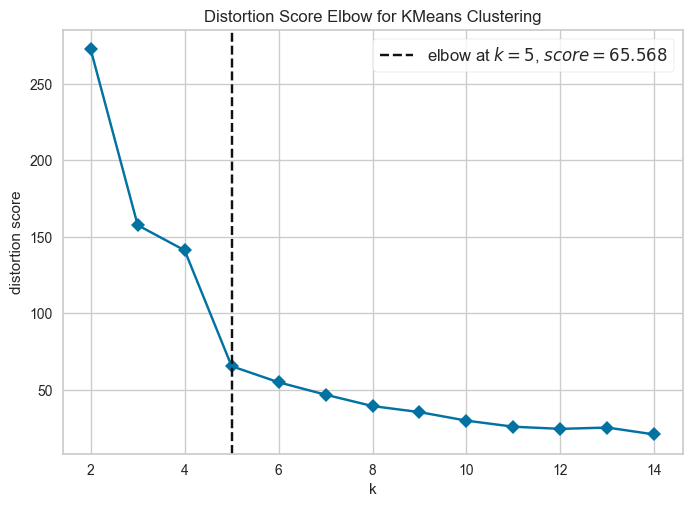

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [19]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=False)

# Create  a K-MEAN model as k=5

In [20]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [21]:
model.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 4, 4,
       4, 4])

In [22]:
X['labels']= model.labels_

In [23]:
X['labels'].unique()

array([0, 3, 1, 2, 4])

In [24]:
X[X['labels']==0]

,Income,Spending,labels
0,15,39,0
2,16,6,0
4,17,40,0
6,18,6,0
8,19,3,0
...,...,...,...
118,67,43,0
119,67,57,0
120,67,56,0
121,67,40,0


In [25]:
X[X['labels']==1]

,Income,Spending,labels
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [26]:
X[X['labels']==2]

,Income,Spending,labels
124,70,29,2
126,71,35,2
128,71,11,2
130,71,9,2
132,72,34,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
142,76,40,2


In [27]:
X[X['labels']==3]

,Income,Spending,labels
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3


# Visulaize the above cluster

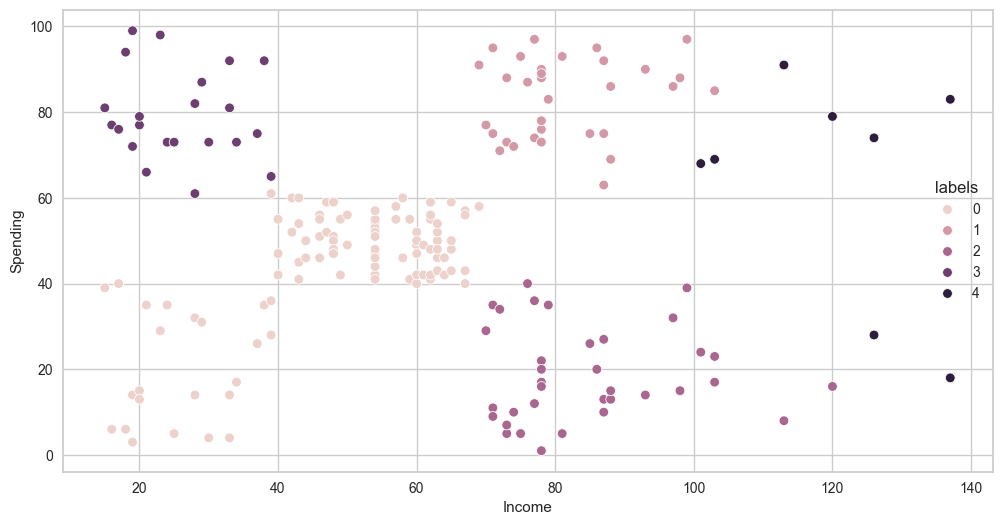

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=X, x='Income', y='Spending',hue='labels')
plt.show()

# Cluster SAME FOR AGE INCOME SPEND

In [29]:
X2 = df[['Age','Income','Spending']]

In [30]:
X2.head(

SyntaxError: incomplete input (4207372118.py, line 1)

# CREATE A SECOND PREPROCCING PIPELINE

In [ ]:
num_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())]).set_output(transform='pandas')

In [ ]:
X2_pre = num_pipe2.fit_transform(X2)
X2_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# ELBOW METHOD

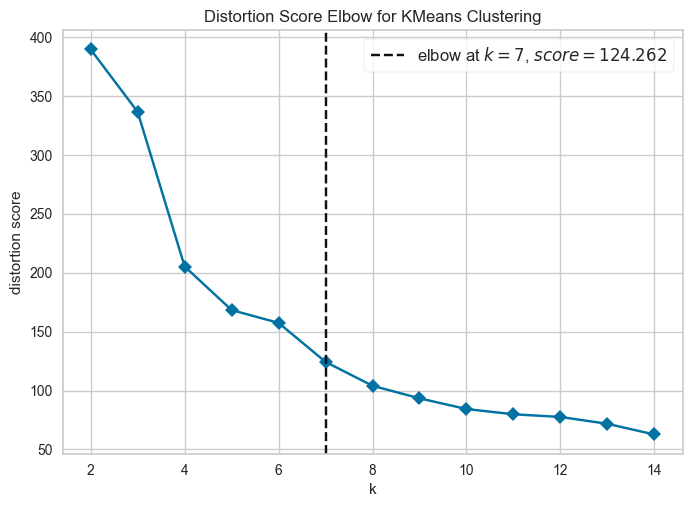

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [ ]:
kelbow_visualizer(KMeans(),
                  X2_pre,
                  k=(2,15),
                  timings=False)

# K-MEAND MODEL WITH CLUTSER 7

In [ ]:
model2 = KMeans(n_clusters=7)
model2.fit(X2_pre)

KMeans(n_clusters=7)

In [ ]:
model2.labels_

array([6, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 2, 6, 5, 1,
       4, 6, 5, 1, 1, 1, 5, 1, 1, 2, 5, 5, 5, 2, 1, 5, 2, 1, 2, 5, 2, 1,
       5, 2, 1, 1, 2, 5, 2, 2, 2, 1, 5, 5, 1, 5, 2, 5, 2, 5, 1, 5, 5, 1,
       1, 5, 2, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 5, 2, 1, 5, 1, 2, 5, 2, 2,
       2, 1, 5, 1, 1, 1, 2, 5, 5, 5, 1, 5, 5, 3, 1, 3, 5, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 5, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 5, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [ ]:
X2['labels']= model2.labels_

In [ ]:
X2.head()

,Age,Income,Spending,labels
0,19,15,39,6
1,21,15,81,6
2,20,16,6,4
3,23,16,77,6
4,31,17,40,4


In [ ]:
for i in range(7):

    print(f'Cluster Name : {i} \n')
    display(X2[X2['labels']==i].head())
    print('\n============\n')

Cluster Name : 0 



,Age,Income,Spending,labels
128,59,71,11,0
130,47,71,9,0
134,20,73,5,0
136,44,73,7,0
138,19,74,10,0




Cluster Name : 1 



,Age,Income,Spending,labels
43,31,39,61,1
47,27,40,47,1
48,29,40,42,1
49,31,40,42,1
51,33,42,60,1




Cluster Name : 2 



,Age,Income,Spending,labels
40,65,38,35,2
53,59,43,60,2
57,69,44,46,2
60,70,46,56,2
62,67,47,52,2




Cluster Name : 3 



,Age,Income,Spending,labels
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3




Cluster Name : 4 



,Age,Income,Spending,labels
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4




Cluster Name : 5 



,Age,Income,Spending,labels
42,48,39,36,5
46,50,40,55,5
50,49,42,52,5
54,50,43,45,5
55,47,43,41,5




Cluster Name : 6 



,Age,Income,Spending,labels
0,19,15,39,6
1,21,15,81,6
3,23,16,77,6
5,22,17,76,6
7,23,18,94,6


# instal plotly and nbformat

In [ ]:
%pip install plotly nbformat

   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.7 MB 3.3 MB/s eta 0:00:05
    --------------------------------------- 0.3/15.7 MB 3.2 MB/s eta 0:00:05
   - -------------------------------------- 0.4/15.7 MB 3.1 MB/s eta 0:00:05
   - -------------------------------------- 0.6/15.7 MB 3.5 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/15.7 MB 3.6 MB/s eta 0:00:05
   -- ------------------------------------- 1.0/15.7 MB 3.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/15.7 MB 3.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.5/15.7 MB 3.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.6/15.7 MB 3.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.8/15.7 MB 3.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.9/15.7 MB 3.8 MB/s eta 0:00:04
   ----- ---------------------------------- 2.1/15.7 MB 3.8 MB/s eta 0:00:04
   ---

# Visulaize the 3d scatterplot for clustering

In [31]:
import plotly.express as px

In [38]:
fig = px.scatter_3d(data_frame=X2, x='Age', y='Income', z='Spending'
                    )
fig.show()

In [49]:
X2.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [52]:
X2.sort_values(by='Age',ascending=True)

,Age,Income,Spending
114,18,65,48
91,18,59,41
65,18,48,59
33,18,33,92
0,19,15,39
...,...,...,...
90,68,59,55
108,68,63,43
57,69,44,46
70,70,49,55


In [54]:
X2.to_csv('Results_timepass.csv',index=False)